In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import imageio
from IPython.core.display import display, HTML, clear_output

In [14]:
F = lambda x: -2*x*(x - 1)
n = 15
xn = 0.01

orbit = [(xn,0)]

for i in range(n):
    orbit.append((xn, xn))
    orbit.append((xn, F(xn)))
    xn = F(xn)
    if abs(xn) > 100:
        break
    

orbit_df = pd.DataFrame(orbit, columns= ["x", "fx"])

mnx, mxx = min(-0.5, orbit_df.x.min()),  max(0.5, orbit_df.x.max())
mny, mxy = min(-0.5, orbit_df.fx.min()), max(0.5, orbit_df.fx.max())

rx = mxx - mnx
ry = mxy - mny

mnx -= (0.1 *rx)
mxx += (0.1 *ry)
mny -= (0.1 *rx)
mxy += (0.1 *ry)

def plot_orbit(F, orbit_df):
    x = np.arange(mnx, mxx, (mxx - mnx) / 30)
    y = np.apply_along_axis(F, 0, x)
    y2 = x

    fig, ax = plt.subplots(figsize=(8, 8), dpi=80)

    # x axis
    ax.plot([mnx - (0.1 *rx), mxx + (0.1 *rx)], [0,0], color="#00000033", linewidth=1, linestyle='dashed')
    #y axis
    ax.plot([0,0], [mny - (0.1 *rx), mxy + (0.1 *ry)], color="#00000033", linewidth=1, linestyle='dashed')

    # function
    ax.plot(x, y)
    # identity
    ax.plot(x, y2)
    
    ax.scatter(orbit_df.x[0], orbit_df.fx[0], color='g')

    ax.plot(orbit_df.x[:-1], orbit_df.fx[:-1], linewidth=2, linestyle=':', color='g')
    ax.plot(orbit_df.x[-2:], orbit_df.fx[-2:], linewidth=2, linestyle='-', color='g')

    ax.set_xlim(mnx, mxx )
    ax.set_ylim(mny, mxy )
    
    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


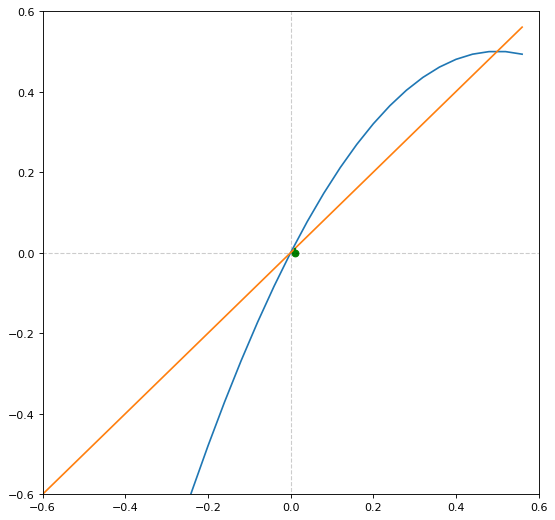

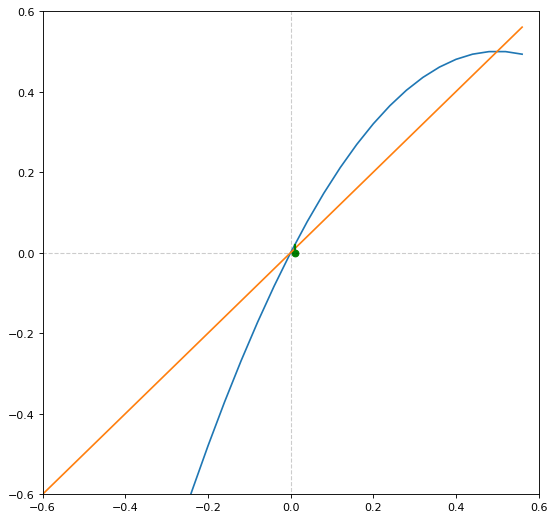

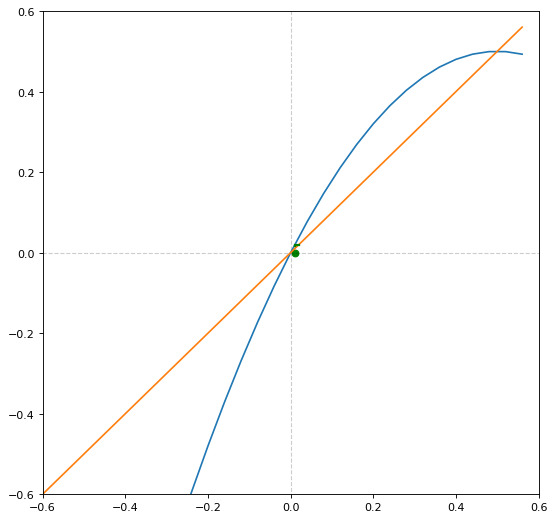

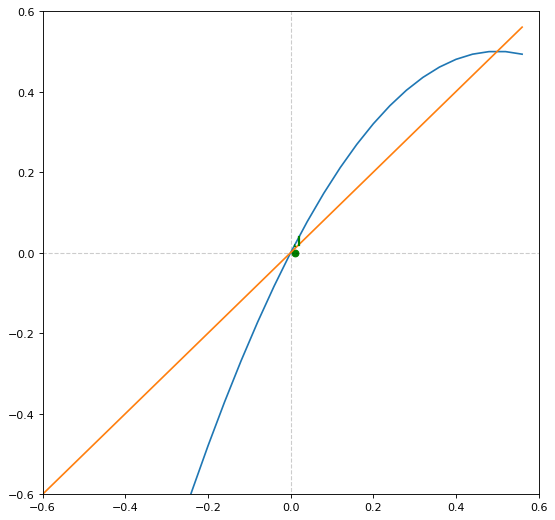

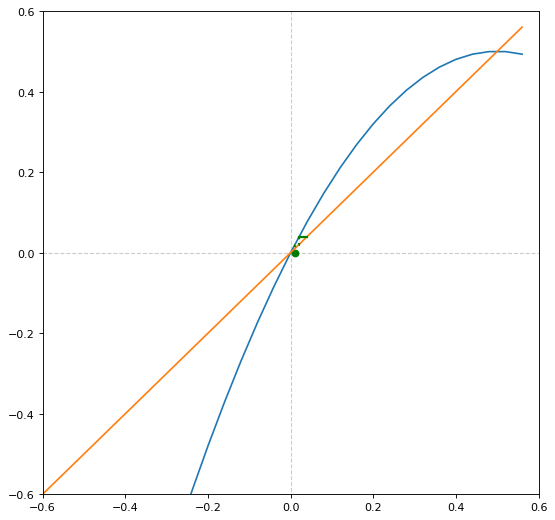

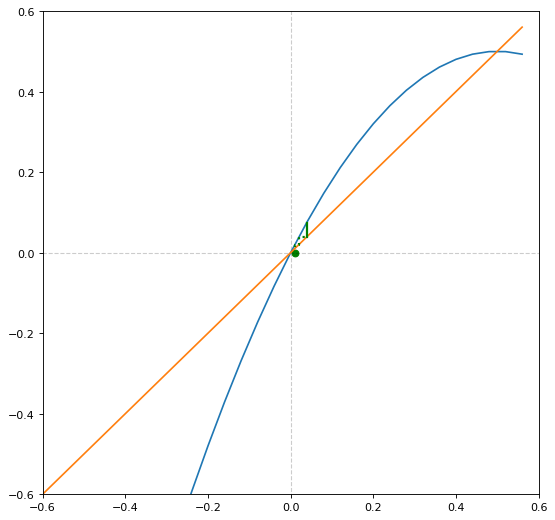

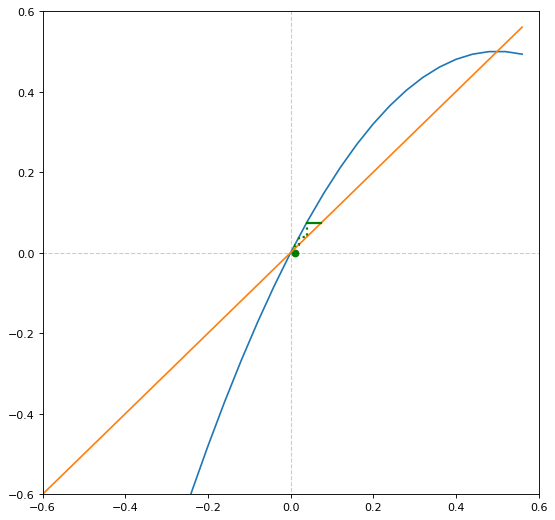

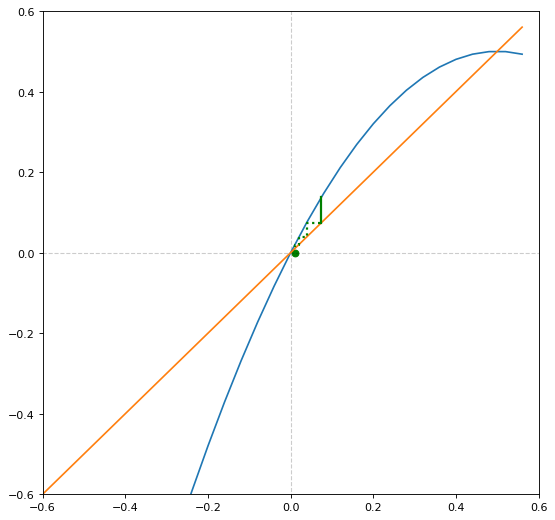

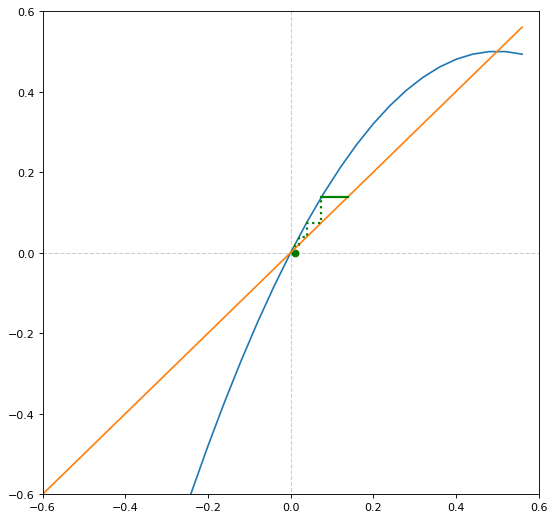

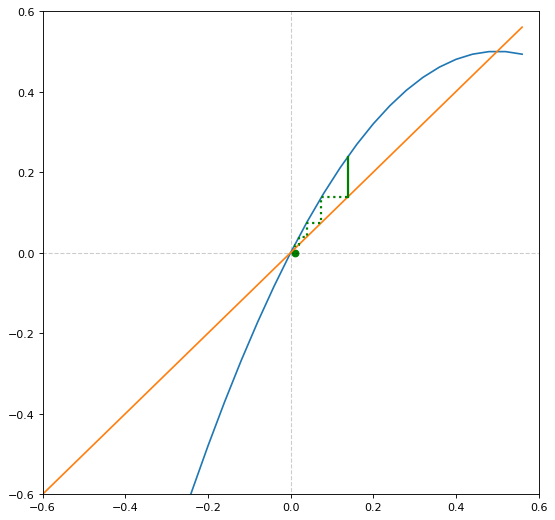

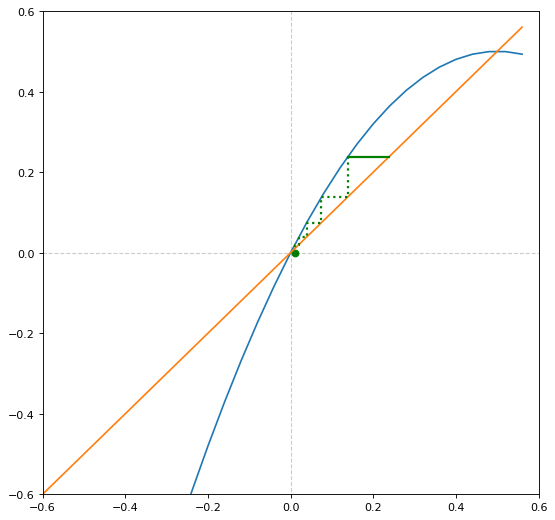

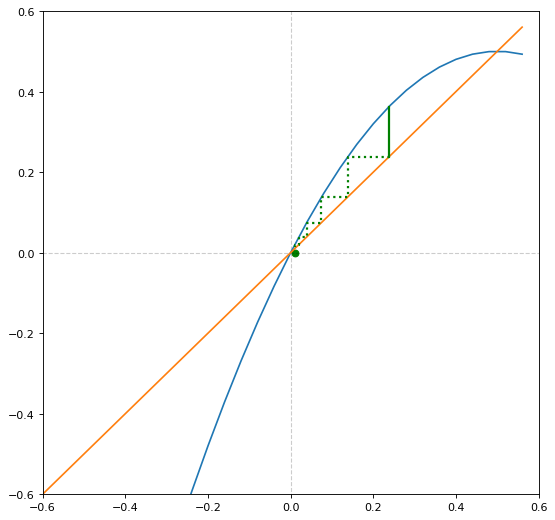

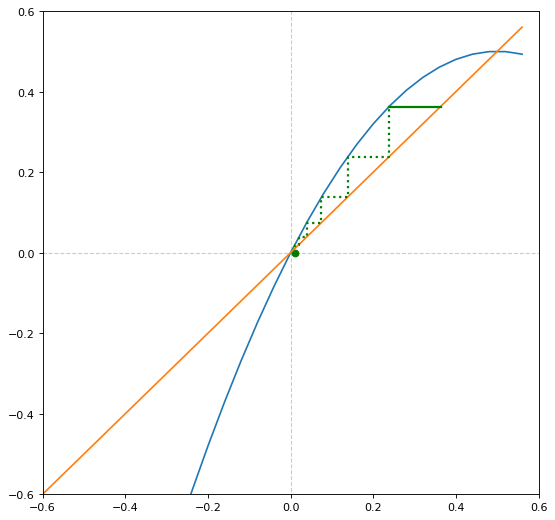

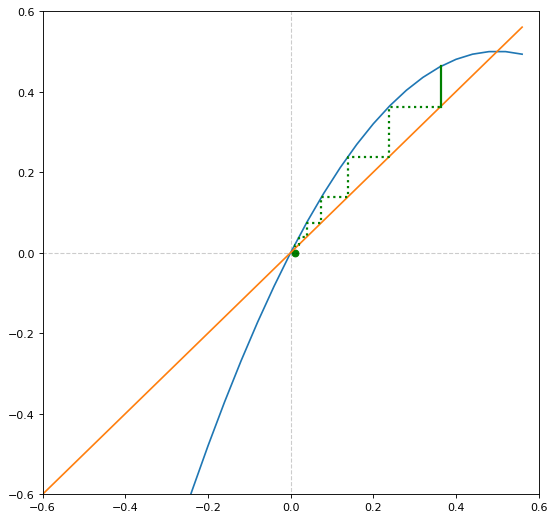

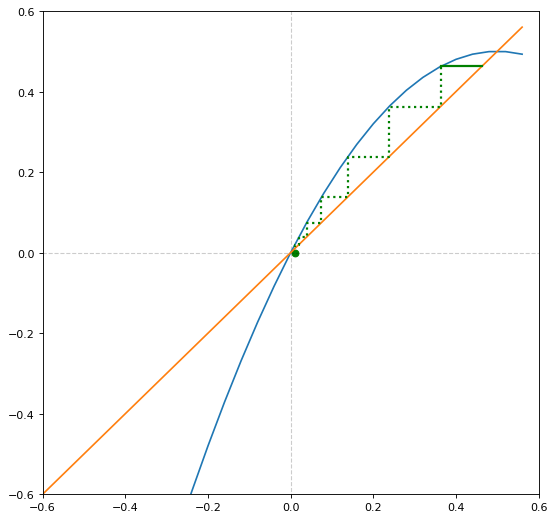

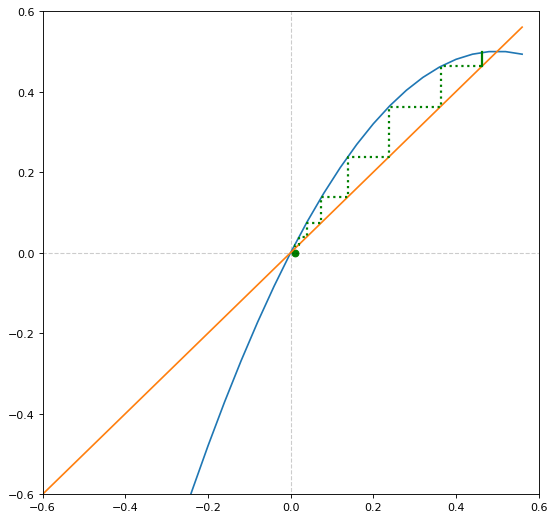

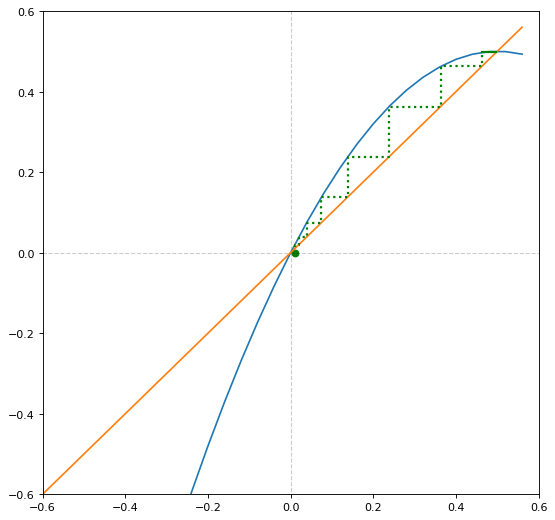

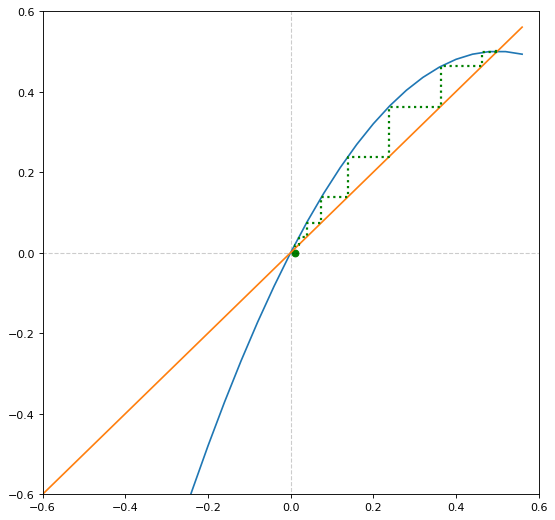

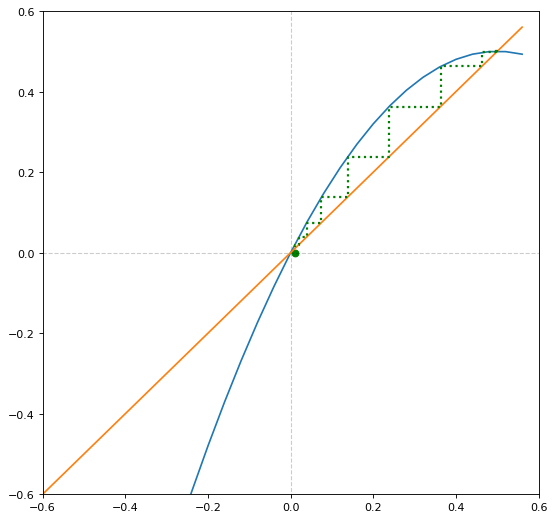

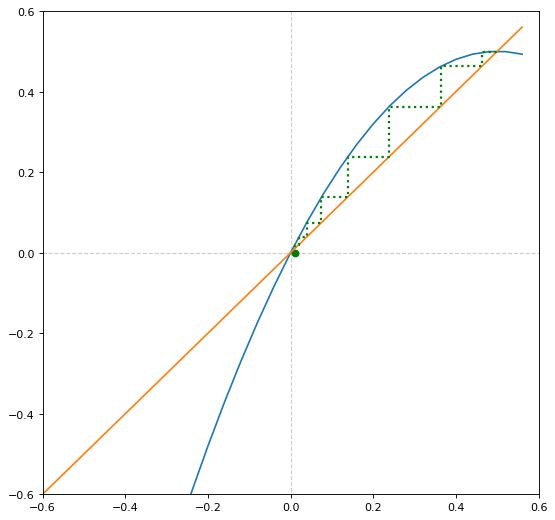

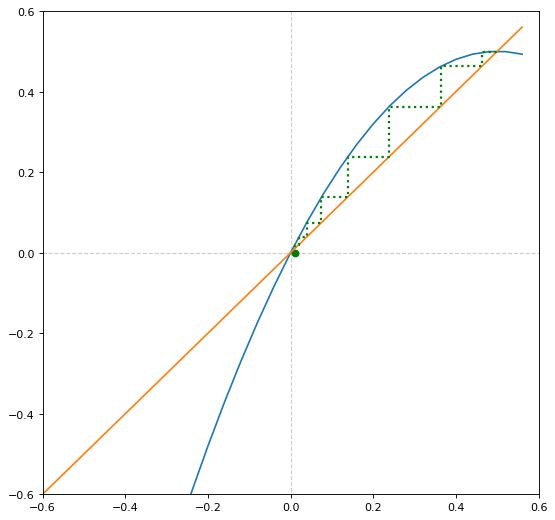

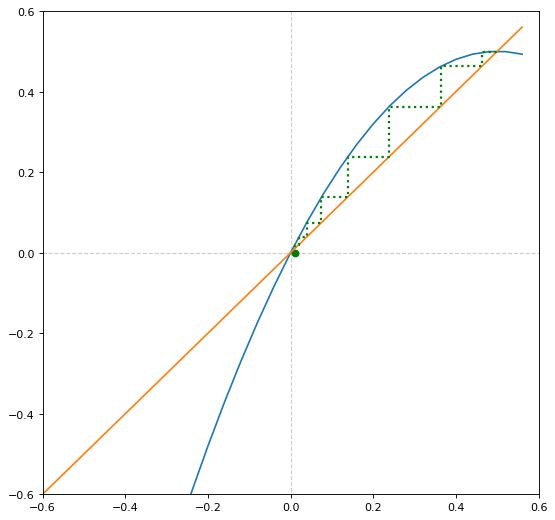

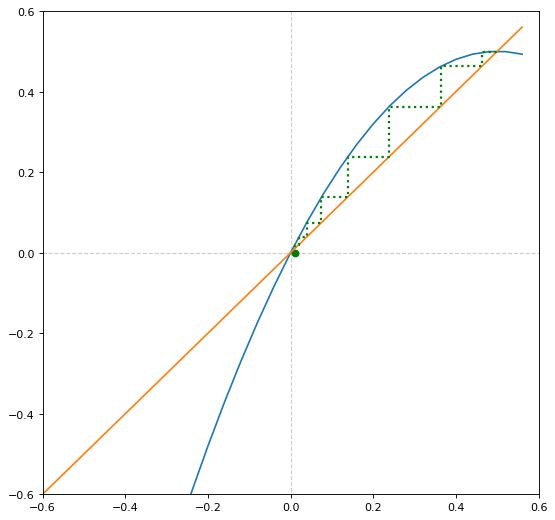

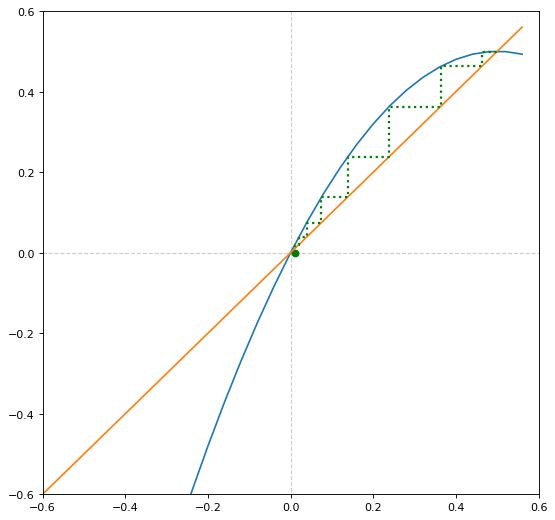

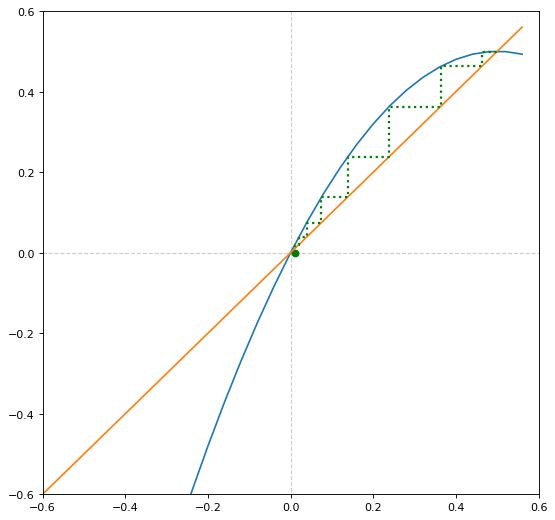

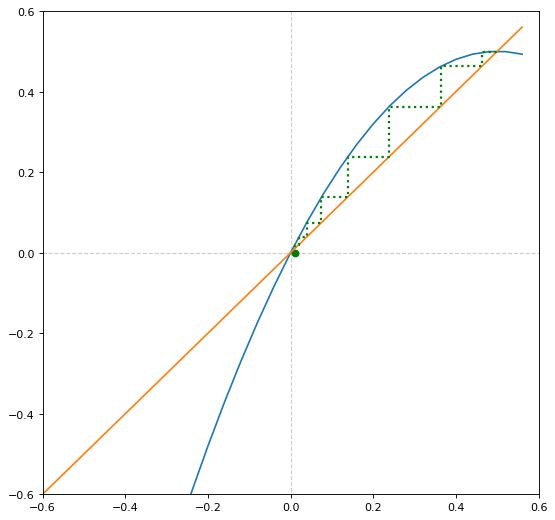

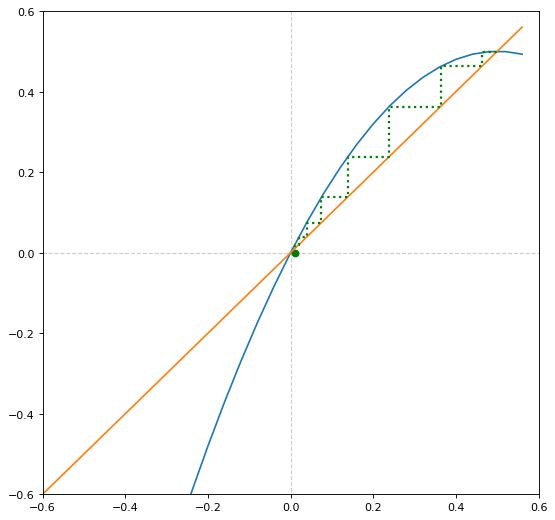

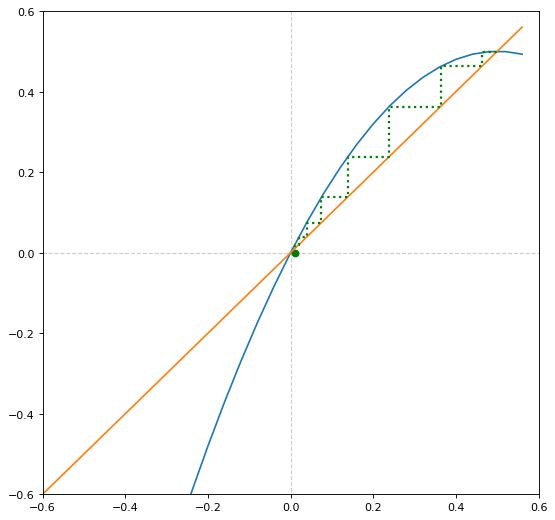

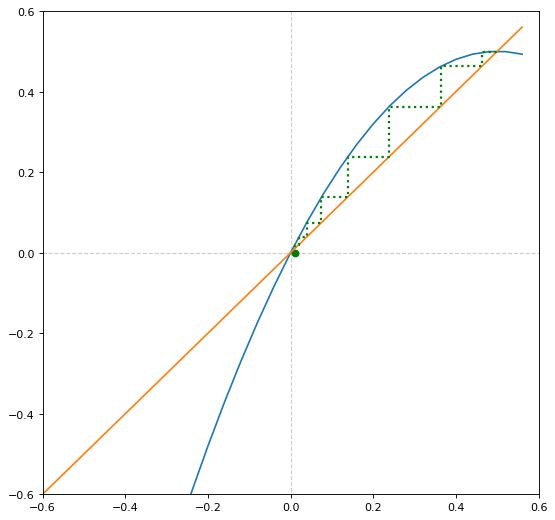

In [15]:
s = imageio.mimsave('./orbit2.gif',
                 [plot_orbit(F, orbit_df[:i]) for i in range(2,orbit_df.shape[0])], 
                format='GIF',
                 fps=3)
display(HTML('<img src="./orbit2.gif">'))

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import imageio
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')

class LogisticMap(object):
    
    def __init__(self, r = 4):
        
        if (r > 4) | (r <= 0):
            print("O parâmetro r deve estar no intervalo (0, 4].")
            self.r = 4
        else:
            self.r = r
            
        self.fig = None
        self.ax = None
            
        self.x = np.arange(0, 1.00001, 1 / 1000)
        
    def set_r(self, r):
        self.r = r
    
    def f(self, x):
        return self.r * x * (1 - x)
    
    def df(self, x):
        return self.r - (2 * self.r * x)
    
    def fn(self, x, n = 1):
        if n == 1:
            return self.f(x)
        else:
            return  self.fn(self.f(x), n - 1)
        
    def dfn(self, x, n = 1):
        if n == 1:
            return self.df(x)
        else:
            return self.df(x) * self.dfn(self.f(x), n - 1)
        
    def prepare_plot(self):
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.plot([0,1], [0,1])
        
        self.fig, self.ax =  fig, ax
        plt.close()
        
    def plot_log_map(self, figax = None, alpha=1):
        
        if figax is None: self.prepare_plot()
        self.ax.plot(self.x, np.apply_along_axis(self.f, 0, self.x), alpha=alpha)
        plt.close()
        
    
    def plot_log_map_n(self, n = 2, alpha=1):
        
        if self.ax is None: self.prepare_plot()
        self.ax.plot(self.x, np.apply_along_axis(lambda x: self.fn(x, n), 0, self.x), alpha=alpha)
        plt.close()

    
    def plot_orbit(self, x0=0.49, iterations=10):
        
        if self.ax is None: self.plot_log_map()

        xn = x0
        alphas = np.arange(0,0.9,1 / (2 * iterations))
        orbit = [(xn,0, alphas[0])]
        

        for i in range(iterations):
            orbit.append((xn, xn, alphas[i+1]))
            orbit.append((xn, self.f(xn), alphas[i+1]))
            xn = self.f(xn)
            
        orbit_df = pd.DataFrame(orbit, columns= ["x", "fx", "alpha"])
        
        lines = orbit_df.shape[0]
        self.ax.scatter(orbit_df.x[0], orbit_df.fx[0], color='g')
        self.ax.scatter(orbit_df.x[lines-1], orbit_df.fx[lines-1], color='g')
        self.ax.plot(orbit_df.x[:-1], orbit_df.fx[:-1], linewidth=2, 
                linestyle='-', color='g')
        self.ax.plot(orbit_df.x[-2:], orbit_df.fx[-2:], 
                linewidth=2, linestyle=':', color='g')
        plt.close()
        
    def plot_lyapunov(self):
        
        result = []
        lambdas = []
        maps = []

        # define range of r 
        rvalues = np.arange(0, 4, 0.01)

        # loop through r
        for r in rvalues:
            x = 0.1
            result = []
            # iterate system 100 times
            for t in range(100):
                x = x + r - x**2
                # calculate log of the absolute of the derivative
                result.append(np.log(abs(1 - 2*x)))
            # take average
            lambdas.append(np.mean(result))
            # for the map ignore first 100 iterations as transient time and iterate anew
            for t in range(20):
                x = x + r - x**2
                maps.append(x)    

        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(1,1,1)

        xticks = np.linspace(0, 2, 8000)
        # zero line
        zero = [0]*8000
        ax.plot(xticks, zero, 'g-')
        # plot map
        ax.plot(xticks, maps, 'r.',alpha = 0.3, label = 'Map')
        ax.set_xlabel('r')
        # plot lyapunov
        ax.plot(rvalues, lambdas, 'b-', linewidth = 3, label = 'Lyapunov exponent')
        ax.grid('on')
        ax.set_xlabel('r')
        ax.legend(loc='best')
        ax.set_title('Map of x(t+1) = x(t) + r - x(t)^2 versus Lyapunov exponent')
        
        self.fig, self.ax = fig, ax
        
        plt.close()
    
    def stabilize(self, x0=0.5, iterations=500):
        xn = x0
        for i in range(iterations):
            xn = self.f(xn)
        return round(xn, 3)
    
    def get_image(self):
        self.fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(self.fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(self.fig.canvas.get_width_height()[::-1] + (3,))
        return image


In [17]:
def make_plot_1(filename, r = 3.5, n = 5):
    
    lm = LogisticMap(r)    
    images = []       
    for i in range(1, n+1):
        lm.plot_log_map_n(n=i, alpha=1)
        images.append(lm.get_image())
    
    imageio.mimsave(filename, images, fps=3)
    return HTML('<img src="%s">'% filename)
    
def make_plot_2(filename, n=1):
    lm = LogisticMap()
    lm.prepare_plot()

    images = []
    for r in np.arange(0.1, 4.1, 1/2):
        lm.set_r(r)
        lm.plot_log_map_n(n = n)
        images.append(lm.get_image())
        
    imageio.mimsave(filename, images, fps=3)
    return HTML('<img src="%s">'% filename)

def make_plot_3(filename):
    lm = LogisticMap()

    images = []
    for r in np.arange(0.1, 4.1, 1/2):
        lm.set_r(r)
        lm.plot_lyapunov()
        images.append(lm.get_image())
        
    imageio.mimsave(filename, images, fps=3)
    return HTML('<img src="%s">'% filename)

In [18]:
%reload_ext autoreload
%autoreload 2
make_plot_1("./plot.gif", r = 1.5, n = 3)

In [19]:
make_plot_2("./plot2.gif", 5)

In [20]:
make_plot_3("./plot3.gif")

In [21]:
lm = LogisticMap()
lm.prepare_plot("./plot2.gif")

for r in np.arange(0.1, 4.1, 1/10):
    lm = LogisticMap(r)
    ax = lm.plot_log_map(figax = ax, alpha=r/4)

TypeError: prepare_plot() takes 1 positional argument but 2 were given

In [ ]:
ax = LogisticMap().prepare_plot()

for r in np.arange(0.1, 4.1, 1/10):
    lm = LogisticMap(r)
    ax = lm.plot_log_map_n(n=2, figax=ax, alpha=r/4)

In [ ]:
ax = LogisticMap().prepare_plot()

for r in np.arange(0.1, 4.1, 1/10):
    lm = LogisticMap(r)
    ax = lm.plot_log_map_n(n=3, figax=ax, alpha=r/4)

In [ ]:
ax = LogisticMap().prepare_plot()

for r in np.arange(0.1, 4.1, 1/20):
    lm = LogisticMap(r)
    ax = lm.plot_log_map_n(n=4, figax=ax, alpha=r/4)

In [ ]:
fig, ax = LogisticMap(2.9).plot_orbit(x0 = 0.2, iterations=40)


ax.set_title("Logistic Map", fontsize=20)
ax.set_xlabel("xn", fontsize=16)
ax.set_ylabel("xn+1", fontsize=16)

In [ ]:
points = []
for r in np.arange(0.01,4.01, 4/1000):
    lm = LogisticMap(r = round(r, 5))
    xrr = np.arange(0, 1.01, 1/100)
    stab_x = list(set([lm.stabilize(x) for x in xrr]))
    for stx in stab_x:
        points.append((round(r, 5), stx))
        
bifurcation = pd.DataFrame(points, columns=["r", "x"])
bifurcation = bifurcation[bifurcation.x > 0]
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x=bifurcation.r, y=bifurcation.x, s=1)        